# 1. Praca domowa 
Napisz w `Julii` symulację Monte Carlo, która wyliczy numerycznie przybliżoną wartość liczby $\pi$ zgodnie z algorytmem podanym na [Wikipedii](https://en.wikipedia.org/wiki/Monte_Carlo_method#Overview). Zdefiniuj funkcję $\pi(liczba\_symulacji)$, która zwraca przyblienie liczby $\pi$ dla liczby symulacji równej $liczba\_symulacji$ (6 pkt.). Uruchom tę funkcję dla: $10 ^ k$, gdzie $k\in [1, 2, 3, 4, 5, 6]$ (3 pkt) i narysuj wykres oszacowania liczby $\pi$ od liczby symulacji (3 pkt). Dla $k\in [1, 2, 3, 4, 5]$ dokonaj po 1000 symulacji i wylicz $5%$ i $95$ percentyle, oraz średnie. Narysuj wykres pokazujący jak zmieniają się te percentyle i średnia od $k$ lub liczby symulacji czyli $10^k$ (3 pkt). 

In [1]:
# przybliżona wartość liczby pi

function π(liczba_symulacji)

    #stworzenie zmiennej, która będzie zliczać liczbę punktów znajdujących się w kole
    inside::Int64 = 0
    
    #pętla, która losuje liczby i sprawdza czy znajdują się w kole
    for i in 1:liczba_symulacji
        x = rand()
        y = rand()
        distance = sqrt(x^2+y^2)
        if distance <= 1
            inside += 1
        end
    end  
    
    #ćwiarka koła
    area::Float64 = inside/liczba_symulacji

    #wartość pi
    pi_value::Float64 = area*4

    #println("Pole ćwiartki koła: $area")
    #println("Przybliżona wartość liczby pi: $pi")

    return pi_value
    #println("inside: $inside")


    
end


π (generic function with 1 method)

In [2]:
#Uruchomienie funkcji dla przykładowej liczby
π(200000000)

3.14162966

In [3]:
#Uruchomienie funkcji dla 10^k
results = []
k_values = [1, 2, 3, 4, 5, 6]
function simulations()
   
    for k in k_values
        liczba_symulacji = 10^k
        #println("Liczba syulacji: $liczba_symulacji")
        push!(results, π(liczba_symulacji))
    end
    return results    
end
simulations()



6-element Vector{Any}:
 3.2
 3.2
 3.176
 3.1252
 3.14084
 3.143396

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


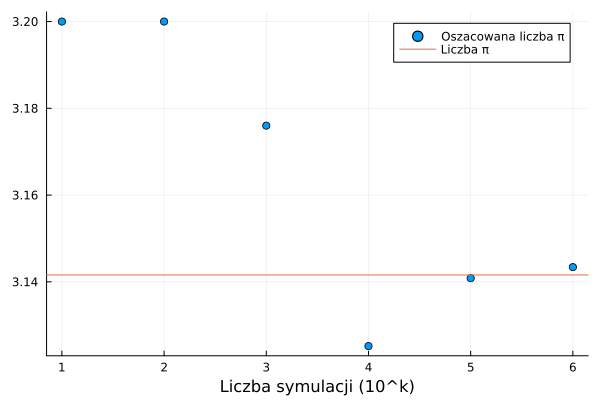

In [4]:
#Wykres dla 10^k
using Pkg
Pkg.add("Plots")
using Plots

#println(k_values)
#println(results)

# Wykres
scatter(k_values, results, label="Oszacowana liczba π")
hline!([pi], label="Liczba π")
xlabel!("Liczba symulacji (10^k)")



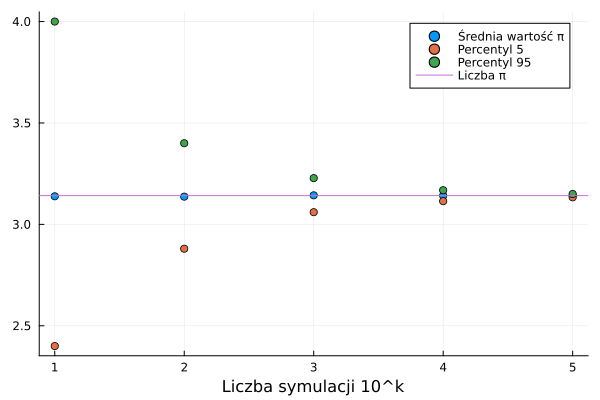

In [5]:
#Oblicznie średnich i percyntyli dla 1000 symulacji
using Statistics

ave = []
per5 = []
per95 = []
k_values_5 = [1,2,3,4,5]

for k in k_values_5
    tab = []
    for i in 1:1000
        pi = π(10^k)
        push!(tab,pi)
    end

    push!(ave, mean(tab))
    push!(per5, quantile(tab, 0.05))
    push!(per95, quantile(tab, 0.95))

#print("Dla k = $k ave jest $ave")
end

#println(ave)
#println(per5)
#println(per95)


#Wykres
scatter(k_values_5, ave, label="Średnia wartość π")
scatter!(k_values_5, per5, label="Percentyl 5")
scatter!(k_values_5, per95, label="Percentyl 95")
hline!([pi], label="Liczba π")
xlabel!("Liczba symulacji 10^k")
